# A Beginner's Guide to Data Analysis Using Python

## Part 1: Reading and Writing Files in Python
### *Mark Bauer* ###

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [1. Search NYC Open Data in Google](##1.-Search-NYC-Open-Data-in-Google)
       * [2. Search "Building Footprints" in NYC Open Data search bar](##-2.-Search-"Building-Footprints"-in-NYC-Open-Data-search-bar)
       * [3. Select "Building Footprints" Dataset](##3.-Select-"Building-Footprints"-Dataset)
       * [4. The Building Footprints Dataset Page](##4.-The-Building-Footprints-Dataset-Page)
       
       
   * [1. Reading In Data](##-1.-Reading-In-Data)
       * [1.1 Reading in data as csv in static form](##-1.1-Reading-in-data-as-csv-in-static-form)
       * [1.2 Reading in data as json in static form](##-1.2-Reading-in-data-as-json-in-static-form)
       * [1.3 Reading in shapefile data](##-1.3-Reading-in-shapefile-data)
       * [1.4 Unzipping and reading in data as csv](##-1.4-Unzipping-and-reading-in-data-as-csv)
       * [1.5 Reading in data from Socrata Open Data API (SODA)](##-1.5-Reading-in-data-from-Socrata-Open-Data-API-%28SODA%29)
      
       
   * [2. Writing Out Data](#-2.-Writing-Out-Data)
       * [2.1 Writing to a CSV file](##-2.1-Writing-to-a-CSV-file)
       * [2.2 Writing to a Excel (xlsx) file](##-2.2-Writing-to-a-Excel-%28xlsx%29-file)
       * [2.3 Writing to a JSON file](##-2.3-Writing-to-a-JSON-file)
       
       
   * [3. Reading In Data from Local Folder](#-3.-Reading-In-Data-from-Local-Folder)
       * [3.1 Reading in a CSV file](##-3.1-Reading-in-a-CSV-file)
       * [3.2 Reading in an Excel file](##-3.2-Reading-in-an-Excel-file)
       * [3.3 Reading in a JSON file](##-3.3-Reading-in-a-JSON-file)
       
       
   * [4. Conclusion](#-4.-Conclusion)

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import geopandas as gpd
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
import urllib
import json
from sodapy import Socrata
import os
import zipfile
from os.path import basename

# Getting Started: Accessing the Building Footprints Dataset

## 1. Search NYC Open Data in Google

![building_footprints](images/1.nyc-open-data-google.png)

## 2. Search "Building Footprints" in NYC Open Data search bar

![building_footprints](images/2.building-footprints-opendata-search.png)

## 3. Select "Building Footprints" Dataset

![building_footprints](images/3.building-footprints-dataset-link.png)

## 4. The Building Footprints Dataset Page

![building_footprints](images/4.data-homepage.png)

## Dataset Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

## Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

## Building Footprints Dataset Identification

> **Here are a few things to note about the data:**
>
> - **Purpose:** This feature class is used by the NYC DOITT GIS group to maintain and distribute an accurate 'basemap' for NYC. The basemap provides the foundation upon virtually all other geospatial data with New York.
- **Description:** Building footprints represent the full perimeter outline of each building as viewed from directly above. Additional attribute information maintained for each feature includes: Building Identification Number (BIN); Borough, Block, and Lot information(BBL); ground elevation at building base; roof height above ground elevation; construction year, and feature type.
- **Source(s):** Annually captured aerial imagery, NYC Research of DOB records, or other image resources.
- **Publication Dates:** **Data**: 05/03/16<br>
- **Last Update:** Weekly<br>
- **Metadata:** 12/22/2016<br>
- **Update Frequency:** Features are updated daily by DoITT staff and a public release is available weekly on NYC Open Data. Every four years a citywide review is made of the building footprints and features are updated photogrammetrically.
- **Available Formats:** File Geodatabase Feature Class as part of the Planimetrics geodatabase and individual shapefile on the [NYC Open Data Portal](https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh)
- **Use Limitations:** Open Data policies and restrictions apply. See [Terms of Use](http://www.nyc.gov/html/data/terms.html)
- **Access Rights:** Public
- **Links:** https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh
- **Tags:** Buildings, Building footprint, BIN, Structure

### Source: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# A Beginner's Guide to Data Analysis Using Python
## Part 1: Reading and Writing Files in Python ##

# 1. Reading In Data

## 1.1 Reading in data as csv in static form

![building_footprints_csv](images/building-footprints-csv.png)

In [24]:
url = 'https://data.cityofnewyork.us/api/views/w75u-biza/rows.csv?accessType=DOWNLOAD'

building_footprints_csv = pd.read_csv(url)

In [25]:
building_footprints_csv.head()

,BIN,NAME,CNSTRCT_YR,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,3394646,NaN,2009.0,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,4548330,NaN,1930.0,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,4460479,NaN,1960.0,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,3355684,NaN,1920.0,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,3131737,NaN,1915.0,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


In [26]:
building_footprints_csv.shape

(1084953, 15)

## 1.2 Reading in data as json in static form

![building_footprints_csv](images/building-footprints-json.png)

In [6]:
url = 'https://data.cityofnewyork.us/api/views/w75u-biza/rows.json?accessType=DOWNLOAD'

with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())

In [7]:
lst = data['meta']['view']['columns']
lst[:5]

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']}]

In [8]:
fieldName = {x['fieldName']: x for x in lst}

for key in fieldName.keys():
    print(key)

:sid
:id
:position
:created_at
:created_meta
:updated_at
:updated_meta
:meta
bin
name
cnstrct_yr
the_geom
lstmoddate
lststatype
doitt_id
heightroof
feat_code
groundelev
shape_area
shape_len
base_bbl
mpluto_bbl
geomsource


In [9]:
columns = [*fieldName]
building_footprints_json = pd.DataFrame(data['data'], columns=columns)

drop_columns = [':sid', ':id', ':position', ':created_at', ':created_meta', ':updated_at', 
                ':updated_meta', ':meta']
building_footprints_json.drop(drop_columns, axis=1, inplace=True)

In [10]:
building_footprints_json.head()

,bin,name,cnstrct_yr,the_geom,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource
0,3394646,None,2009,MULTIPOLYGON (((-73.87129515296562 40.65717370...,1503360000,Constructed,1212853,21.60850812,2100,18,854.66243317866,125.0797955584,3044520815,3044520815,Photogramm
1,4548330,None,1930,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1502928000,Constructed,1226227,10.36,5110,122,217.59424346169,60.22585821856,4030640041,4030640041,Photogramm
2,4460479,None,1960,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1503360000,Constructed,581946,29.81157033,2100,10,946.42747637737,123.14194057237,4139430001,4139430001,Photogramm
3,3355684,None,1920,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1502928000,Constructed,858061,11.2,5110,32,248.67816852809,63.94081721089,3049720006,3049720006,Photogramm
4,3131737,None,1915,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1503360000,Constructed,568078,24.98,2100,44,1163.227668698,165.60876340496,3055100055,3055100055,Photogramm


In [11]:
building_footprints_json.shape

(1084953, 15)

## 1.3 Reading in shapefile data

![building_footprints_csv](images/building-footprints-shp.png)

In [2]:
url = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Shapefile'
building_footprints_shp = gpd.read_file(url)

building_footprints_shp.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,3044520815,3394646.0,2009.0,1212853.0,2100.0,Photogramm,18.0,21.608508,2017-08-22,00:00:00.000,Constructed,3044520815,None,854.662433,125.079796,POLYGON ((-73.87129515296562 40.65717370043455...
1,4030640041,4548330.0,1930.0,1226227.0,5110.0,Photogramm,122.0,10.360000,2017-08-17,00:00:00.000,Constructed,4030640041,None,217.594243,60.225858,POLYGON ((-73.87670970144625 40.71425234541623...
2,4139430001,4460479.0,1960.0,581946.0,2100.0,Photogramm,10.0,29.811570,2017-08-22,00:00:00.000,Constructed,4139430001,None,946.427476,123.141941,"POLYGON ((-73.85195485799383 40.6623547177829,..."
3,3049720006,3355684.0,1920.0,858061.0,5110.0,Photogramm,32.0,11.200000,2017-08-17,00:00:00.000,Constructed,3049720006,None,248.678169,63.940817,POLYGON ((-73.94029215265738 40.64108287979622...
4,3055100055,3131737.0,1915.0,568078.0,2100.0,Photogramm,44.0,24.980000,2017-08-22,00:00:00.000,Constructed,3055100055,None,1163.227669,165.608763,POLYGON ((-73.98998983552244 40.62383804513802...


(905493.3579938668, 1075075.4564274154, 113374.81680443122, 280254.5115220599)

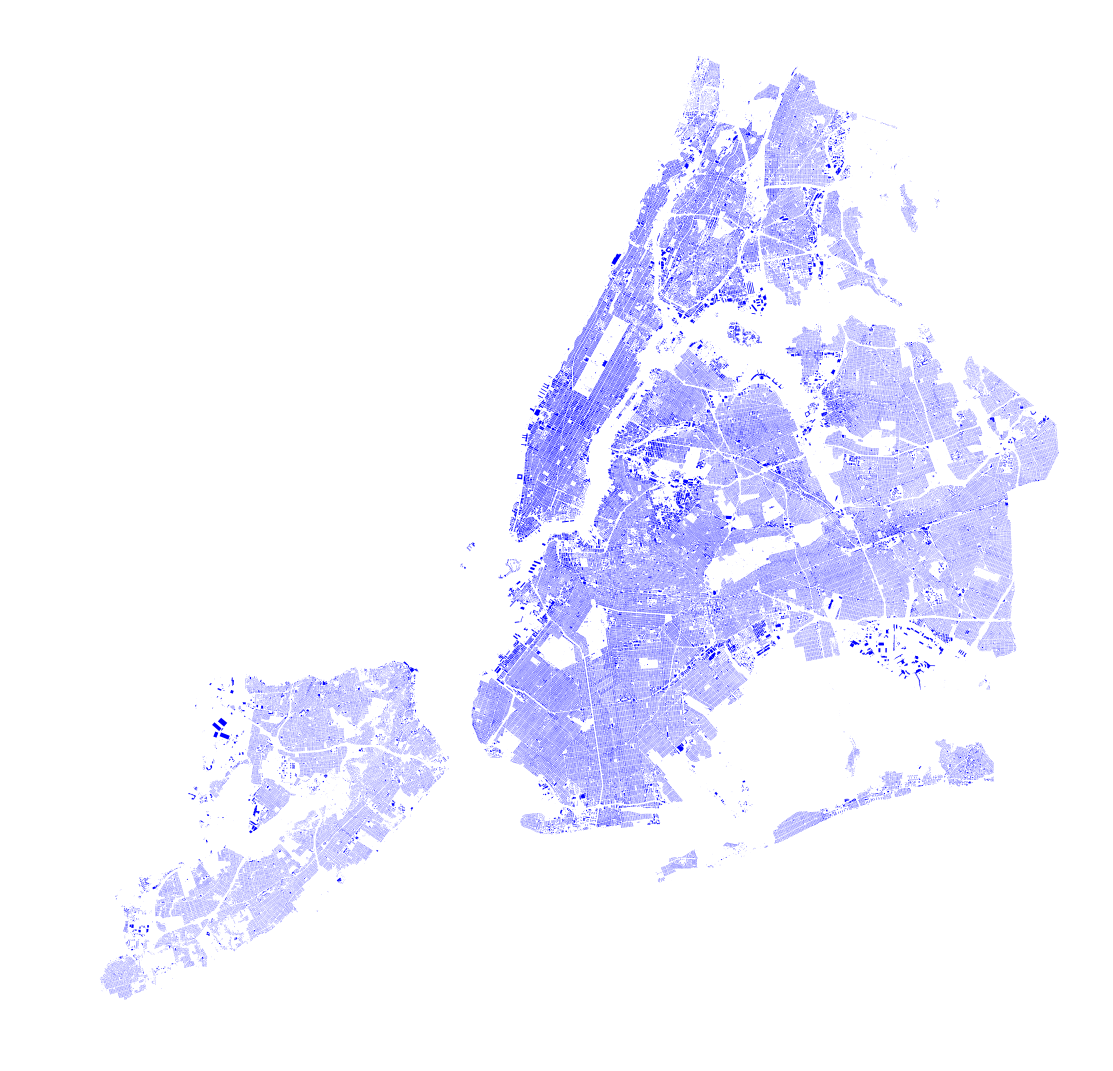

In [100]:
fig, ax = plt.subplots(figsize=(20,15))

building_footprints_shp = building_footprints_shp.to_crs(epsg=2263)
building_footprints_shp.plot(ax=ax, color='b')
plt.tight_layout()
plt.axis('off')

In [3]:
building_footprints_shp.shape

(1084918, 16)

## 1.4 Unzipping and reading in data as csv

Another popular dataset is NYC's PLUTO dataset. We will use this one because it comes in a zip file.

Description: Extensive land use and geographic data at the tax lot level in comma–separated values (CSV) file format. The PLUTO files contain more than seventy fields derived from data maintained by city agencies.

Dataset Link: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

Data Dictionary: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?v=20v1

![building_footprints_csv](images/pluto-csv.png)

In [13]:
cd ~/Downloads/

/Users/geribauer/Downloads


In [14]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

my_path = '/Users/geribauer/Downloads'
fullfilename = os.path.join(my_path, 'PLUTO.gz')
urllib.request.urlretrieve(url, fullfilename)

('/Users/geribauer/Downloads/PLUTO.gz',
 <http.client.HTTPMessage at 0x17ff5f780>)

In [15]:
file_path = '/Users/geribauer/Downloads/PLUTO.gz'

items = zipfile.ZipFile(file_path)

# available files in the container
print(items.namelist())

['pluto_20v1.csv', 'PLUTODD20v1.pdf', 'PlutoReadme20v1.pdf']


In [17]:
# opening Zip using 'with' keyword in read mode
with zipfile.ZipFile(file_path, 'r') as file:
    file.extractall()

In [21]:
downloads = '/Users/geribauer/Downloads/'

# read our data into a DataFrame
pluto_data = pd.read_csv(downloads + 'pluto_20v1.csv')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,18,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
pluto_data.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes
0,BK,834,46,307.0,106.0,2001.0,20.0,38.0,11220.0,L114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
1,QN,4042,106,407.0,929.0,3000.0,25.0,19.0,11356.0,E297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000007...,NaN,NaN
2,BK,4679,17,317.0,866.0,3002.0,18.0,41.0,11203.0,L174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000006...,NaN,NaN
3,BK,7831,6,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
4,BK,7831,7,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN


In [23]:
pluto_data.shape

(859172, 99)

## 1.4 Unzipping and reading in data as csv from Local Folder


In [31]:
cd data-analysis-using-python/1-reading-writing-files

/Users/geribauer/data-analysis-using-python/1-reading-writing-files


In [32]:
building_footprints_csv.head(20).to_csv('data/sample-buildings.csv', index=False)

In [33]:
file_path = 'data/zipped-data/sample-buidlings.zip'

with zipfile.ZipFile(file_path, 'w') as file:
        # write mode overrides all the existing files in the 'Zip.'
        # you have to create the file which you have to write to the 'Zip.'
        file.write('data/sample-buildings.csv', basename('data/sample-buildings.csv'))

In [34]:
print(zipfile.is_zipfile(file_path))

True


In [35]:
%ls data/zipped-data/

sample-buidlings.zip


In [36]:
items = zipfile.ZipFile(file_path)

# available files in the container
print(items.namelist())

['sample-buildings.csv']


In [37]:
file_name = 'data/zipped-data/sample-buidlings.zip'

# opening Zip using 'with' keyword in read mode
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall('data/zipped-data')

In [38]:
%ls data/zipped-data/

sample-buidlings.zip  sample-buildings.csv


In [39]:
sample_buidlings = pd.read_csv('data/zipped-data/sample-buildings.csv')
sample_buidlings.head()

,BIN,NAME,CNSTRCT_YR,the_geom,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,3394646,NaN,2009.0,MULTIPOLYGON (((-73.87129515296562 40.65717370...,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,4548330,NaN,1930.0,MULTIPOLYGON (((-73.87670970144625 40.71425234...,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,4460479,NaN,1960.0,MULTIPOLYGON (((-73.85195485799383 40.66235471...,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,3355684,NaN,1920.0,MULTIPOLYGON (((-73.94029215265738 40.64108287...,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,3131737,NaN,1915.0,MULTIPOLYGON (((-73.98998983552244 40.62383804...,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


In [40]:
sample_buidlings.shape

(20, 15)

## 1.5 Reading in data from Socrata Open Data API (SODA)

**Note: If you haven't signed up for an app token, there is a 1,000 rows limit.**

![building_footprints_csv](images/building-footprints-soda-api.png)

In [2]:
# Enter the information from those sections here
socrata_domain = 'data.cityofnewyork.us' # nyc open data domain
socrata_dataset_identifier = 'i62d-kjv8' # building footprints dataset identifier

# App Tokens can be generated by creating an account at https://opendata.socrata.com/signup
# Tokens are optional (`None` can be used instead), though requests will be rate limited.
#
# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export SODAPY_APPTOKEN=<token>
socrata_token = os.environ.get("SODAPY_APPTOKEN")

Source: https://github.com/xmunoz/sodapy/blob/master/examples/basic_queries.ipynb

In [3]:
client = Socrata(socrata_domain, socrata_token)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

Domain: data.cityofnewyork.us
Session: <requests.sessions.Session object at 0x122639978>
URI Prefix: https://


We are setting the **limit** at **2,000,000 rows** (i.e. the full data set).

In [17]:
results = client.get(socrata_dataset_identifier, limit=2000000)
building_footprints_soda_api = pd.DataFrame.from_dict(results)
building_footprints_soda_api.head()

,the_geom,bin,cnstrct_yr,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource,name
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3394646,2009,2017-08-22T00:00:00.000Z,Constructed,1212853,21.60850812,2100,18,854.66243317866,125.0797955584,3044520815,3044520815,Photogramm,NaN
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",4548330,1930,2017-08-17T00:00:00.000Z,Constructed,1226227,10.36,5110,122,217.59424346169,60.22585821856,4030640041,4030640041,Photogramm,NaN
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",4460479,1960,2017-08-22T00:00:00.000Z,Constructed,581946,29.81157033,2100,10,946.42747637737,123.14194057237,4139430001,4139430001,Photogramm,NaN
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3355684,1920,2017-08-17T00:00:00.000Z,Constructed,858061,11.2,5110,32,248.67816852809,63.94081721089,3049720006,3049720006,Photogramm,NaN
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3131737,1915,2017-08-22T00:00:00.000Z,Constructed,568078,24.98,2100,44,1163.227668698,165.60876340496,3055100055,3055100055,Photogramm,NaN


In [21]:
building_footprints_soda_api.shape

(1084918, 15)

In [22]:
client.close()

**Useful resources:**
    
API Docs: https://dev.socrata.com/foundry/data.cityofnewyork.us/i62d-kjv8

Sign up for app token: https://data.cityofnewyork.us/profile/edit/developer_settings

Python client for the Socrata Open Data API: https://github.com/xmunoz/sodapy

Examples: https://github.com/xmunoz/sodapy/tree/master/examples

# 2. Writing Out Data

### For simplicity, we're only exporting buildings built from 2010 to present

In [40]:
building_footprints_after_2010 = building_footprints_csv.loc[(building_footprints_csv.CNSTRCT_YR > 2009) 
                                                       & (building_footprints_csv.CNSTRCT_YR < 2021)]

building_footprints_after_2010.reset_index(drop=True, inplace=True)

In [41]:
building_footprints_after_2010.head()

,the_geom,BIN,NAME,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.8865806294611 40.765213774...,4519592,NaN,2016.00,08/22/2017 12:00:00 AM +0000,Constructed,1067231,12.03,2100.00,26.00,1800.09,196.15,4010770041,4010770041.00,Other (Man
1,MULTIPOLYGON (((-73.98406915139554 40.75857096...,1022662,NaN,2013.00,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.93,2100.00,49.00,2129.63,243.38,1009990008,1009990008.00,Photogramm
2,MULTIPOLYGON (((-73.81781192423676 40.76172685...,4113946,NaN,2011.00,08/22/2017 12:00:00 AM +0000,Constructed,1161290,40.67,2100.00,76.00,1053.43,146.18,4050270022,4050270022.00,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,4540051,NaN,2010.00,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.33,2100.00,112.00,1314.30,164.15,4030600139,4030600139.00,Photogramm
4,MULTIPOLYGON (((-73.81452818900115 40.66865339...,4257289,NaN,2012.00,08/10/2017 12:00:00 AM +0000,Constructed,1259485,24.84,2100.00,27.00,1552.47,167.15,4118590023,4118590023.00,Other (Man


In [42]:
building_footprints_after_2010.shape

(13136, 15)

In [43]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

building_footprints_after_2010.sort_values(by='CNSTRCT_YR').CNSTRCT_YR.unique()

array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020.])

In [44]:
%ls data/

README.md


## 2.1 Writing to a CSV file

In [45]:
building_footprints_after_2010.to_csv('data/building-after-2010.csv', index=False)

%ls data/

README.md                building-after-2010.csv


## 2.2 Writing to an Excel (xlsx) file

In [46]:
building_footprints_after_2010.to_excel('data/building-after-2010.xlsx', index=False)

%ls data/

README.md                 building-after-2010.csv   building-after-2010.xlsx


## 2.3 Writing to a JSON file

In [47]:
building_footprints_after_2010.to_json('data/building-after-2010.json')

%ls data/

README.md                 building-after-2010.json
building-after-2010.csv   building-after-2010.xlsx


# 3. Reading In Data from Local Folder

In [48]:
%ls data/

README.md                 building-after-2010.json
building-after-2010.csv   building-after-2010.xlsx


## 3.1 Reading in a CSV file

In [49]:
building_footprints_after_2010 = pd.read_csv('data/building-after-2010.csv')
building_footprints_after_2010.head()

,the_geom,BIN,NAME,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.8865806294611 40.765213774...,4519592,NaN,2016.00,08/22/2017 12:00:00 AM +0000,Constructed,1067231,12.03,2100.00,26.00,1800.09,196.15,4010770041,4010770041.00,Other (Man
1,MULTIPOLYGON (((-73.98406915139554 40.75857096...,1022662,NaN,2013.00,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.93,2100.00,49.00,2129.63,243.38,1009990008,1009990008.00,Photogramm
2,MULTIPOLYGON (((-73.81781192423676 40.76172685...,4113946,NaN,2011.00,08/22/2017 12:00:00 AM +0000,Constructed,1161290,40.67,2100.00,76.00,1053.43,146.18,4050270022,4050270022.00,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,4540051,NaN,2010.00,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.33,2100.00,112.00,1314.30,164.15,4030600139,4030600139.00,Photogramm
4,MULTIPOLYGON (((-73.81452818900115 40.66865339...,4257289,NaN,2012.00,08/10/2017 12:00:00 AM +0000,Constructed,1259485,24.84,2100.00,27.00,1552.47,167.15,4118590023,4118590023.00,Other (Man


In [50]:
building_footprints_after_2010.shape

(13136, 15)

## 3.2 Reading in an Excel file

In [51]:
building_footprints_after_2010 = pd.read_excel('data/building-after-2010.xlsx')
building_footprints_after_2010.head()

,the_geom,BIN,NAME,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.8865806294611 40.765213774...,4519592,NaN,2016,08/22/2017 12:00:00 AM +0000,Constructed,1067231,12.03,2100.00,26.00,1800.09,196.15,4010770041,4010770041.00,Other (Man
1,MULTIPOLYGON (((-73.98406915139554 40.75857096...,1022662,NaN,2013,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.93,2100.00,49.00,2129.63,243.38,1009990008,1009990008.00,Photogramm
2,MULTIPOLYGON (((-73.81781192423676 40.76172685...,4113946,NaN,2011,08/22/2017 12:00:00 AM +0000,Constructed,1161290,40.67,2100.00,76.00,1053.43,146.18,4050270022,4050270022.00,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,4540051,NaN,2010,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.33,2100.00,112.00,1314.30,164.15,4030600139,4030600139.00,Photogramm
4,MULTIPOLYGON (((-73.81452818900115 40.66865339...,4257289,NaN,2012,08/10/2017 12:00:00 AM +0000,Constructed,1259485,24.84,2100.00,27.00,1552.47,167.15,4118590023,4118590023.00,Other (Man


In [52]:
building_footprints_after_2010.shape

(13136, 15)

## 3.3 Reading in a JSON file

In [53]:
building_footprints_after_2010 = pd.read_json('data/building-after-2010.json')
building_footprints_after_2010.head()

,the_geom,BIN,NAME,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.8865806294611 40.765213774...,4519592,None,2016,08/22/2017 12:00:00 AM +0000,Constructed,1067231,12.03,2100.00,26.00,1800.09,196.15,4010770041,4010770041.00,Other (Man
1,MULTIPOLYGON (((-73.98406915139554 40.75857096...,1022662,None,2013,08/22/2017 12:00:00 AM +0000,Constructed,633694,76.93,2100.00,49.00,2129.63,243.38,1009990008,1009990008.00,Photogramm
2,MULTIPOLYGON (((-73.81781192423676 40.76172685...,4113946,None,2011,08/22/2017 12:00:00 AM +0000,Constructed,1161290,40.67,2100.00,76.00,1053.43,146.18,4050270022,4050270022.00,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,4540051,None,2010,08/22/2017 12:00:00 AM +0000,Constructed,1171655,28.33,2100.00,112.00,1314.30,164.15,4030600139,4030600139.00,Photogramm
4,MULTIPOLYGON (((-73.81452818900115 40.66865339...,4257289,None,2012,08/10/2017 12:00:00 AM +0000,Constructed,1259485,24.84,2100.00,27.00,1552.47,167.15,4118590023,4118590023.00,Other (Man


In [54]:
building_footprints_after_2010.shape

(13136, 15)

# 4. Conclusion